LIBRARY

In [1]:
import glob 
import os.path as osp 
import random 
import numpy as np 
import json 
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn as nn 
import torch.optim as optim # import optimizer như adam, sgd
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

In [2]:
torch.manual_seed(1234) # cố định random seed để mỗi lần chạy code sẽ cho ra kết quả giống nhau
np.random.seed(1234)
random.seed(1234)

In [3]:
#torch.backends.cudnn.deterministic = True # cố định các phép toán trên GPU để mỗi lần chạy code sẽ cho ra kết quả giống nhau
#torch.backends.cudnn.benchmark = False # cố định các phép toán trên GPU để mỗi lần chạy code sẽ cho ra kết quả giống nhau

TẠO CLASS ...

In [4]:
class ImageTransform():
    def __init__(self, resize, mean, std):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])    
            }
    def __call__(self, img, phase ='train'):
        return self.data_transform[phase](img)

GIAI ĐOẠN 

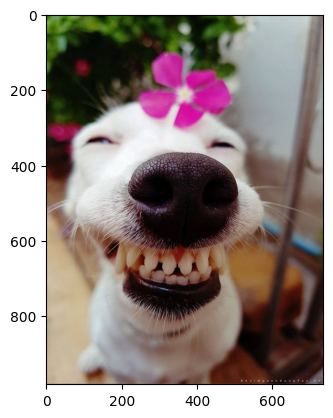

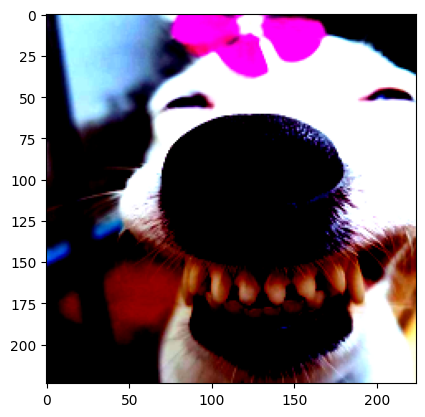

In [5]:
img_file_path = './data/7817abbc472d8b0af9585fe29f99e12d (1).jpg'
img = Image.open(img_file_path)

plt.imshow(img)
plt.show()
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = ImageTransform(size, mean, std)
img_transformed = transform(img, phase='train')
#(channel, height, width) -> (height, width, channel) -> ( 0,1) 
img_transformed = img_transformed.numpy().transpose((1,2,0))
img_transformed = np.clip(img_transformed, 0, 1) # giới hạn giá trị trong khoảng (0,1)
plt.imshow(img_transformed)
plt.show()

HÀM ...

In [6]:
def make_datapath_list(phase='train'):
    rootpath = './data/hymenoptera_data/'
    target_path = osp.join(rootpath+phase+'/**/*.jpg')
    path_list = []
    
    for path in glob.glob(target_path):
        path_list.append(path)
    return path_list


In [7]:
path_list = make_datapath_list ('train')

In [8]:
len(path_list)

243

In [9]:
path_list[:10]

['./data/hymenoptera_data/train\\ants\\0013035.jpg',
 './data/hymenoptera_data/train\\ants\\1030023514_aad5c608f9.jpg',
 './data/hymenoptera_data/train\\ants\\1095476100_3906d8afde.jpg',
 './data/hymenoptera_data/train\\ants\\1099452230_d1949d3250.jpg',
 './data/hymenoptera_data/train\\ants\\116570827_e9c126745d.jpg',
 './data/hymenoptera_data/train\\ants\\1225872729_6f0856588f.jpg',
 './data/hymenoptera_data/train\\ants\\1262877379_64fcada201.jpg',
 './data/hymenoptera_data/train\\ants\\1269756697_0bce92cdab.jpg',
 './data/hymenoptera_data/train\\ants\\1286984635_5119e80de1.jpg',
 './data/hymenoptera_data/train\\ants\\132478121_2a430adea2.jpg']

In [10]:
train_img_list = make_datapath_list(phase='train')
val_img_list = make_datapath_list(phase='val')

In [17]:
class Mydataset(data.Dataset):
    def __init__(self, file_list, transform=None, phase='train'):
        self.file_list = file_list
        self.transform = transform
        self.phase = phase
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transform(img, self.phase)
        
        if self.phase == 'train' :
            label = img_path[30:34]
        
        elif self.phase == 'val':
            label = img_path[28:32]
        if label == 'ants':
            label = 1
        if label == 'bees':
            label = 0
        return img_transformed, label

In [18]:
train_dataset = Mydataset(file_list=train_img_list, transform =ImageTransform(size, mean, std), phase='train') 
val_dataset = Mydataset(file_list=val_img_list, transform =ImageTransform(size, mean, std), phase='val')

In [ ]:
index = 0 
#print(train_dataset.__len__())
img , label = train_dataset.__getitem__(index)
print(img.shape)
print(label)

torch.Size([3, 224, 224])
1
